# Ejercicio 50
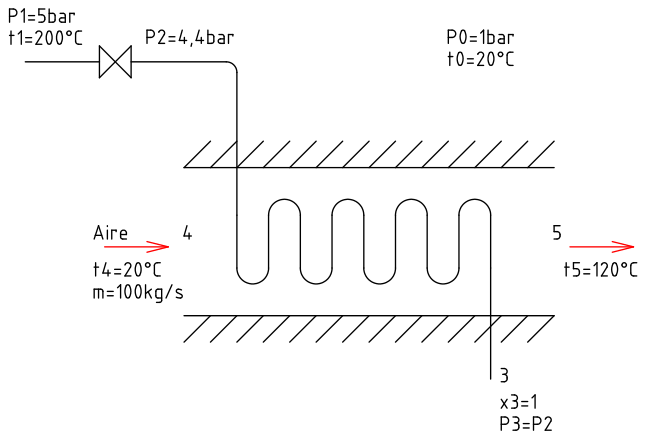

__Calcular:__

$$\begin{array}{ll}
1) & m_v \\
2) & \Delta S_u \\
3) & \Delta Ex_u \\
4) & \eta_{ex} \\
\end{array}$$

## Solución

$\left.
\begin{array}{l}
P_1 = 5 \, \mathrm{bar} \\
t_1 = 200^\circ \mathrm{C}
\end{array}
\right\} \quad \rightarrow \quad
\left[
\begin{array}{l}
h_1 \\
s_1
\end{array}
\right]$

In [ ]:
!pip install CoolProp # (Google Colab only)
import CoolProp.CoolProp as cp

     |████████████████████████████████| 4.2 MB 5.1 MB/s 


In [ ]:
# Datos:
P1 = 5e5 # Pa
T1 = 200 + 273.15 # K

In [ ]:
h1 = cp.PropsSI('H','P',P1,'T',T1,'Water')
s1 = cp.PropsSI('S','P',P1,'T',T1,'Water')

In [ ]:
#@title
print('h1 = %s kJ/kg'%round(h1/1e3,2))
print('s1 = %s kJ/kg*K'%round(s1/1e3,5))

h1 = 2855.84 kJ/kg
s1 = 7.06102 kJ/kg*K


$\left.
\begin{array}{l}
P_2 = 4,4 \, \mathrm{bar} \\
h_2 = h_1
\end{array}
\right\} \quad \rightarrow \quad
\left[
\begin{array}{l}
t_2 \\
s_2
\end{array}
\right]$

In [ ]:
P2 = 4.4e5 # Pa
h2 = h1

In [ ]:
T2 = cp.PropsSI('T','P',P2,'H',h2,'Water')
s2 = cp.PropsSI('S','P',P2,'H',h2,'Water')

In [ ]:
#@title
print('T2 = %s K'%round(T2,2))
print('t2 = %s°C'%round(T2 - 273.15,2))
print('s2 = %s kJ/kg*K'%round(s2/1e3,5))

T2 = 471.7 K
t2 = 198.55°C
s2 = 7.11853 kJ/kg*K


$\left.
\begin{array}{l}
x_3 = 1 \\
P_3 = P_2
\end{array}
\right\} \quad \rightarrow \quad
\left[
\begin{array}{l}
h_3 \\
s_3
\end{array}
\right]$

In [ ]:
P3 = P2
x3 = 1

In [ ]:
h3 = cp.PropsSI('H','P',P3,'Q',x3,'Water')
s3 = cp.PropsSI('S','P',P3,'Q',x3,'Water')
T3 = cp.PropsSI('T','P',P3,'Q',x3,'Water')

In [ ]:
#@title
print('h3 = %s kJ/kg'%round(h3/1e3,2))
print('s3 = %s kJ/kg*K'%round(s3/1e3,5))
print('T3 = %s K'%round(T3,2))
print('t3 = %s°C'%round(T3 - 273.15,2))

h3 = 2742.37 kJ/kg
s3 = 6.86356 kJ/kg*K
T3 = 420.23 K
t3 = 147.08°C


$$ \Delta H_{45} = m_{aire} c_p \Delta T $$

In [ ]:
# Datos:
m_aire = 100 # Kg/s
cp = 1.0047e3 # J/kg*K
DT = 100 # K

In [ ]:
DH45 = m_aire*cp*DT

In [ ]:
#@title
print('DH45 = %s kJ/s'%round(DH45/1e3,2))

DH45 = 10047.0 kJ/s


$$ \Delta H_{45} = \Delta H_{23} = m_v (h_2 - h_3) $$

$$ m_v = \frac{\Delta H_{45}}{h_2 - h_3} $$

In [ ]:
mv = DH45/(h2 - h3)

In [ ]:
#@title
print('mv = %s kg/s'%round(mv,3))

mv = 88.547 kg/s


$\begin{array}{l}
\Delta S_{12} = m_v (s_2 - s_1) \\
\Delta S_{23} = m_v (s_3 - s_2)
\end{array}$

In [ ]:
DS12 = mv*(s2 - s1)
DS23 = mv*(s3 - s2)

In [ ]:
#@title
print('DS12 = %s kJ/K'%round(DS12/1e3,5))
print('DS23 = %s kJ/K'%round(DS23/1e3,5))

DS12 = 5.09216 kJ/K
DS23 = -22.5763 kJ/K


$$ \Delta S_{45} = m_{aire} \left( c_p \ln \frac{T_5}{T_4} - R \underbrace{ \ln \frac{P_5}{P_4} }_{= \, 0} \right) $$
consideramos $P_4 = P_5$

In [ ]:
import math

In [ ]:
T4 = 20 + 273.15 # K
T5 = 120 + 273.15 # K

DS45 = m_aire*(cp*math.log(T5/T4))

In [ ]:
#@title
print('DS45 = %s kJ/K'%round(DS45/1e3,5))

DS45 = 29.48863 kJ/K


$$ \Delta S_u = \Delta S_{12} + \Delta S_{23} + \Delta S_{45} $$

In [ ]:
DSu = DS12 + DS23 + DS45

In [ ]:
#@title
print('DSu = %s kJ/K'%round(DSu/1e3,5))

DSu = 12.00449 kJ/K


$$ \Delta Ex_u = - T_0 \Delta S_u $$

In [ ]:
T0 = 20 + 273.15 # K

DExu = - T0*DSu

In [ ]:
#@title
print('DExu = %s kJ'%round(DExu/1e3,2))

DExu = -3519.12 kJ


$$ \Delta Ex_{13} = m_v (h_3 - h_1) - m_v T_0 (s_3 - s_1) $$

In [ ]:
DEx13 = mv*(h3 - h1) - mv*T0*(s3 - s1)

In [ ]:
#@title
print('DEx13 = %s kJ'%round(DEx13/1e3,3))

DEx13 = -4921.525 kJ


$$ \Delta Ex_{45} = \Delta H_{45} - T_0 \Delta S_{45} $$

In [ ]:
DEx45 = DH45 - T0*DS45

In [ ]:
#@title
print('DEx45 = %s kJ'%round(DEx45/1e3,3))

DEx45 = 1402.409 kJ


$$ \eta_{ex} = \frac{\Delta Ex_{45}}{|\Delta Ex_{13}|} $$

In [ ]:
eta_ex = DEx45/abs(DEx13)

In [ ]:
#@title
print('eta_ex = %s'%round(eta_ex,4))

eta_ex = 0.285
